<a href="https://colab.research.google.com/github/SewarYousef/FaceDetectorandCounter/blob/main/face_detector_and_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opencv-python
! pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 43.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil
shutil.copytree('/content/drive/My Drive/dataset', 'data')

Mounted at /content/drive


'data'

In [ ]:
#Import necessary packages
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Define mediapipe Face detector
face_detection = mp.solutions.face_detection.FaceDetection(0.8)
img = cv2.imread('/content/data/fullface/girls.jpg')

In [ ]:
def detector(frame):
    count = 0
    height, width, channel = frame.shape
    # Convert frame BGR to RGB colorspace
    imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Detect results from the frame
    result = face_detection.process(imgRGB)
    # Extract information from the result
    # If some detection is available then extract those information from result
    try:
      for count, detection in enumerate(result.detections):

          score = detection.score
          box = detection.location_data.relative_bounding_box

          x, y, w, h = int(box.xmin*width), int(box.ymin * height), int(box.width*width), int(box.height*height)
          score = str(round(score[0]*100, 2))

          print(x, y, w, h)

          # Draw rectangles

          cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
          cv2.rectangle(frame, (x, y), (x+w, y-25), (0, 0, 255), -1)

          cv2.putText(frame, score, (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
      count += 1
      print("Number of counted faces: ", count)

  # If detection is not available then pass
    except:
          pass
    return count, frame

Where every face is located in the image: 
217 70 91 91
424 141 90 90
576 111 107 107
51 106 97 97
Number of counted faces:  4


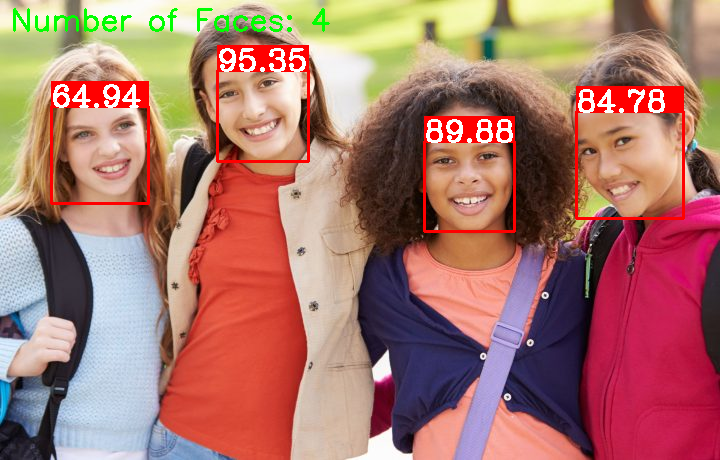

-1

In [ ]:
# Run the detection
print("Where every face is located in the image: " )
count, output = detector(img)
cv2.putText(output, "Number of Faces: "+str(count),(10, 30),
cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2 )
cv2_imshow(output)
cv2.waitKey(0)